## EDA(탐색적분석)

- naver와 brunch 블로그 크롤링 데이터를 기준으로 진행
- 가정: 블로그에 언급된 글 건수가 해당 관광지에 대한 사람들의 긍정적인 관심을 의미하며 계절별로 게시되는 블로그 글의 비율은 해당 관광지의 계절별 특성을 의미한다. 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 데이터 깨짐방지
import platform
path = 'C:\\Windows\\Fonts\\malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [4]:
# 전체 데이터 읽기
df = pd.read_parquet('after_preprocessing.parquet')

### 계절별 블로그 글 건수를 기준으로 분류

- postdate를 기준으로 계절을 구분한다.

In [61]:
mainF = df.groupby('source')['postdate'].agg([
    ('봄건수', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([3, 4, 5]))),
    ('여름건수', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([6, 7, 8]))),
    ('가을건수', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([9, 10, 11]))),
    ('겨울건수', lambda x: np.sum(pd.to_datetime(x).dt.month.isin([1, 2, 12])))
]).reset_index()

In [65]:
f = df.groupby('source')['postdate'].agg([
    ('봄비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([3, 4, 5]))),
    ('여름비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([6, 7, 8]))),
    ('가을비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([9, 10, 11]))),
    ('겨울비율', lambda x: np.mean(pd.to_datetime(x).dt.month.isin([1, 2, 12])))
]).reset_index()

mainF = mainF.merge(f, how='left')
mainF

In [70]:
sizeF = df.groupby('source')['content'].agg([
    ('전체건수', np.size)
]).reset_index()

mainF = mainF.merge(sizeF, how='left')
mainF

In [88]:
# 특정 관광지에 대한 블로그의 양이 일정기준에 도달하지 못할 경우 
# 해당 관광지에 대한 데이터는 타 데이터와 비교하는 의미가 없다고 판단
# 기준 도출: 중간값, 평균값
print(f'중간값: {mainF["전체건수"].median()}')
print(f'평균값: {mainF["전체건수"].mean()}')

중간값: 350.0
평균값: 353.9197651663405


In [89]:
# 중간값과 평균값의 차이가 크지않기 때문에 중간값을 기준으로 전체 블로그 건수가 미달되는 관광지들 제거
meanTotal = mainF[mainF['전체건수'] > mainF['전체건수'].median()] 
meanTotal.sort_values(by=['전체건수'], axis=0)

,source,봄건수,여름건수,가을건수,겨울건수,봄비율,여름비율,가을비율,겨울비율,전체건수
535,아름다운피부과,64,54,82,151,0.182336,0.153846,0.233618,0.430199,351
483,쇠소깍제트,69,144,83,55,0.196581,0.410256,0.236467,0.156695,351
32,거문오름(UNESCO 세계자연유산),77,95,84,95,0.219373,0.270655,0.239316,0.270655,351
602,오현단,98,76,88,90,0.278409,0.215909,0.250000,0.255682,352
289,방림원,83,94,84,92,0.235127,0.266289,0.237960,0.260623,353
...,...,...,...,...,...,...,...,...,...,...
431,섭지코지,263,168,204,372,0.261172,0.166832,0.202582,0.369414,1007
58,곶자왈,245,198,223,356,0.239726,0.193738,0.218200,0.348337,1022
980,함덕해수욕장,268,252,220,284,0.261719,0.246094,0.214844,0.277344,1024
357,사려니숲길,231,226,252,336,0.221053,0.216268,0.241148,0.321531,1045


In [198]:
totalSort = meanTotal.sort_values(by=['전체건수'], axis=0, ascending=False)[:10]

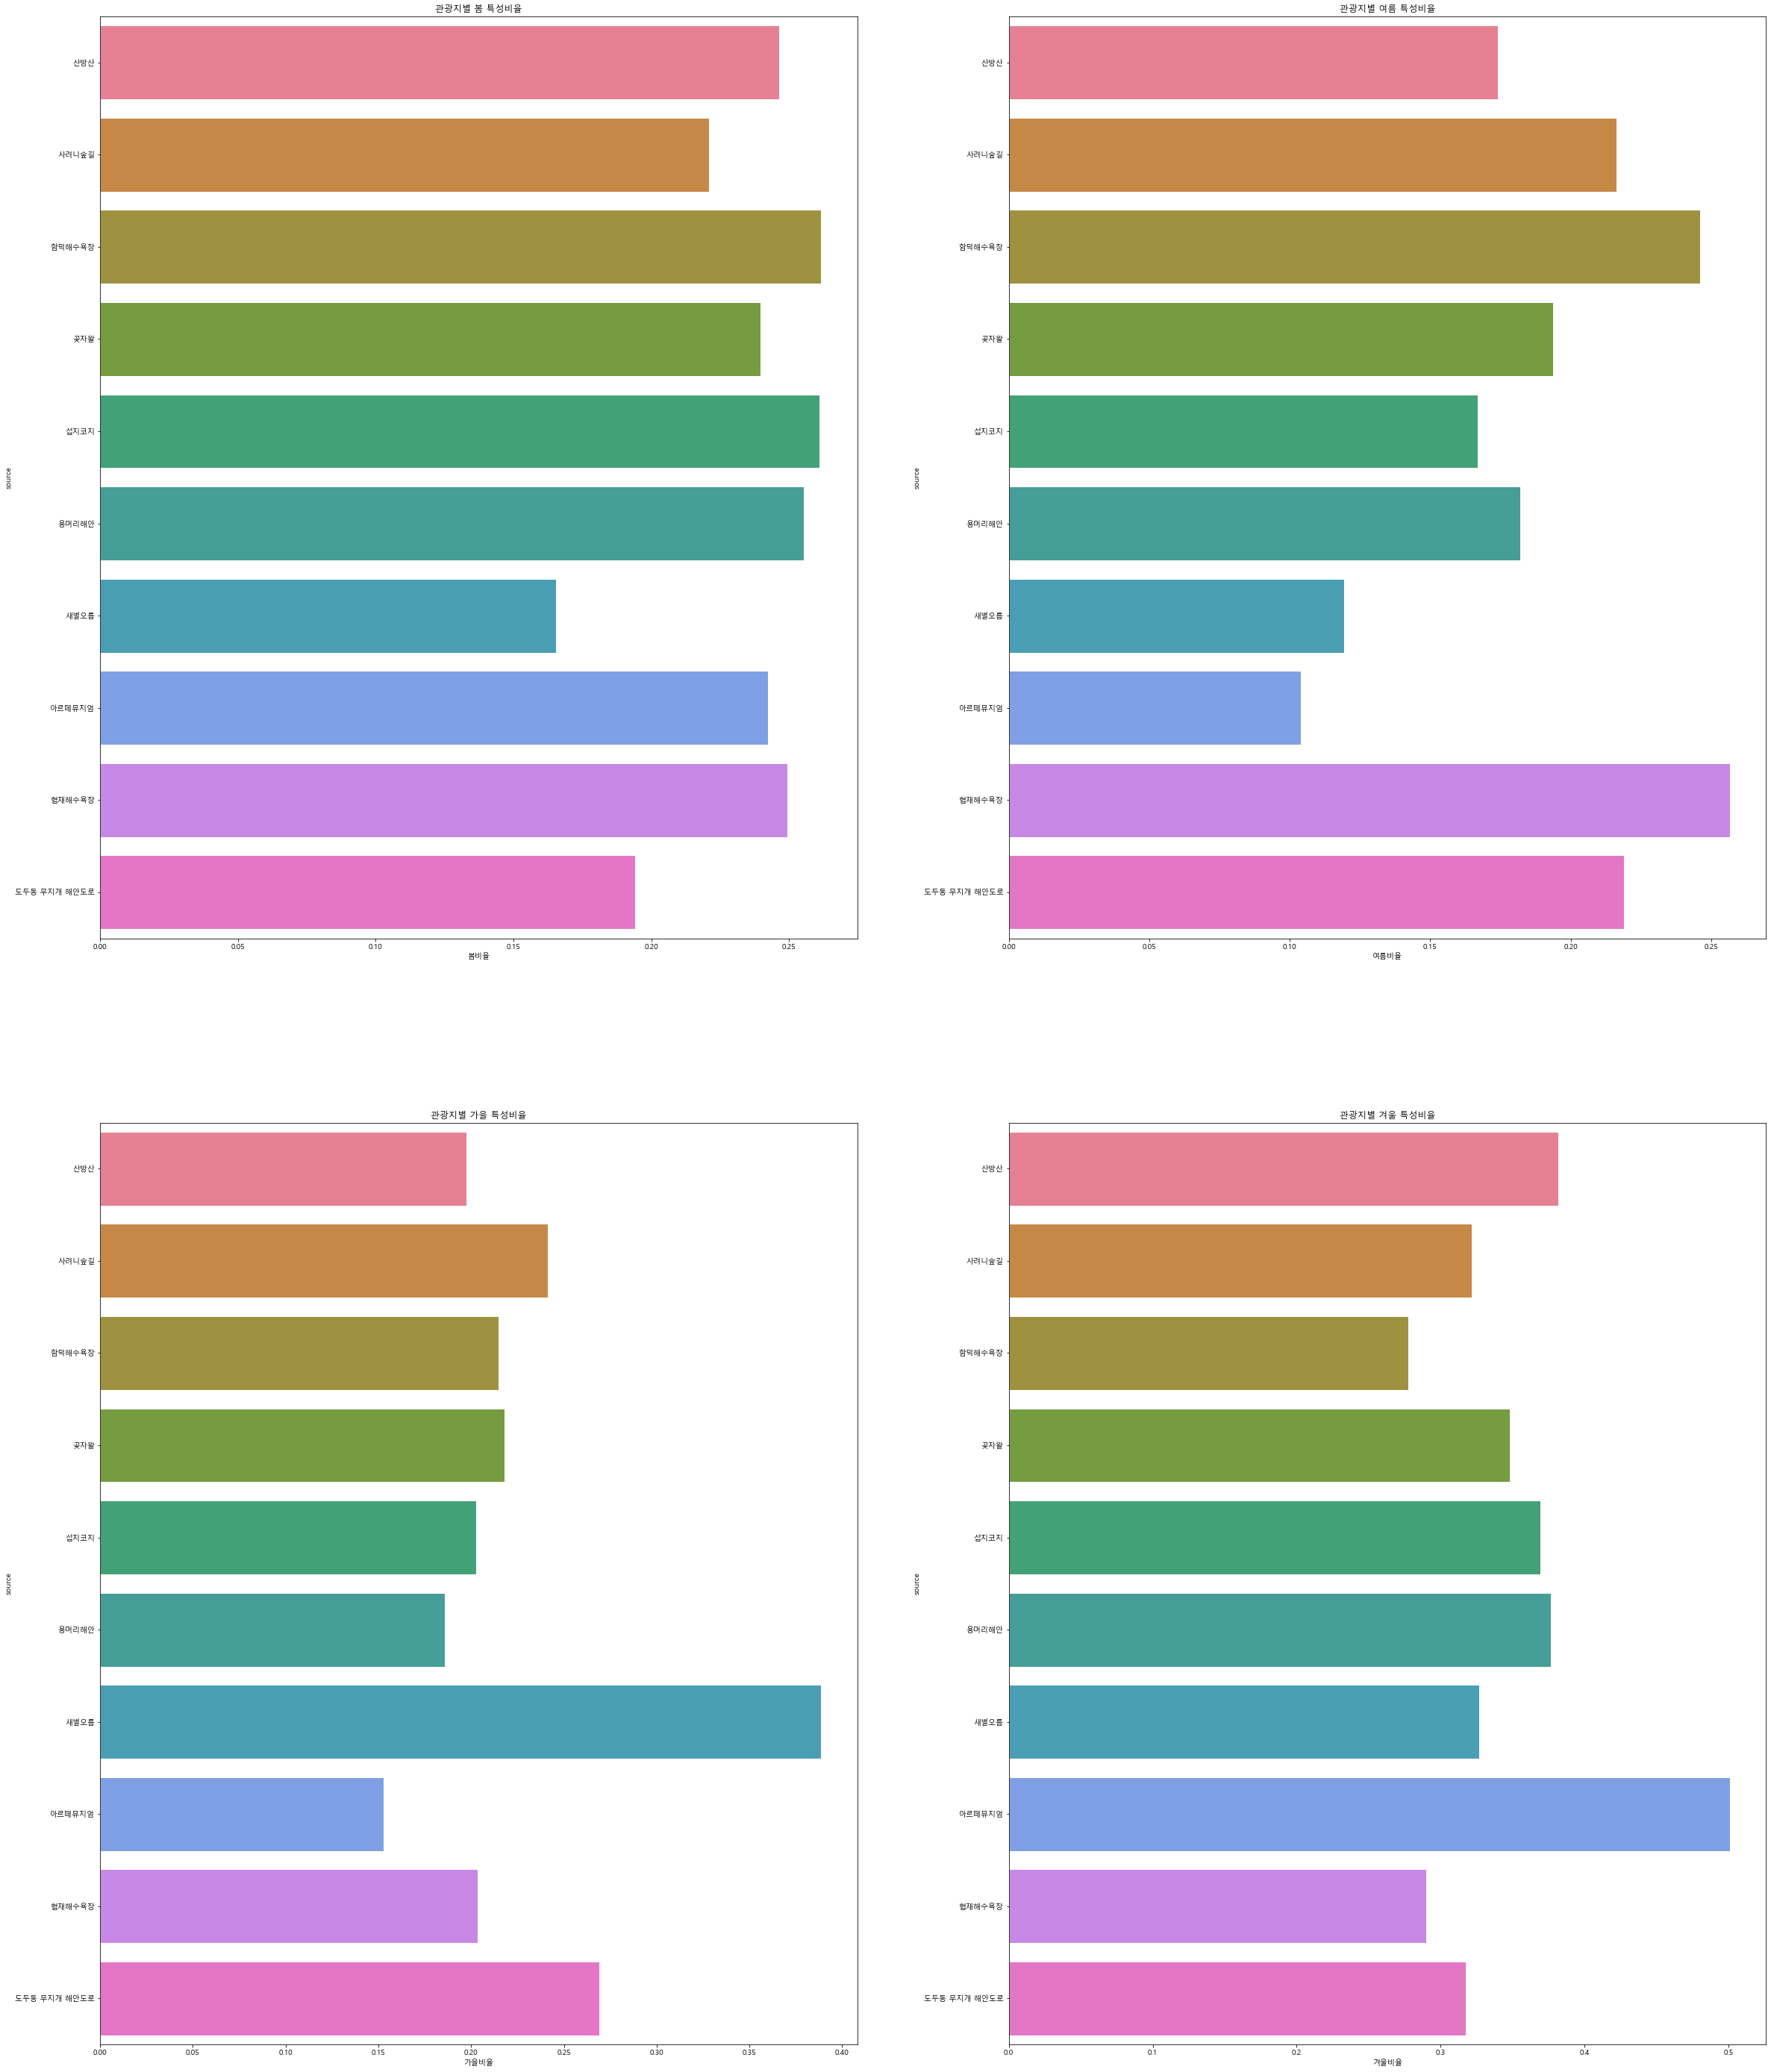

In [200]:
# 전체건수 기준 상위 10개 관광지의 계절별 특성 시각화

f, ax = plt.subplots(figsize = (40,50))

plt.subplot(2, 2, 1)
sns.set_color_codes('pastel')
sns.barplot(x = '봄비율', y = 'source', data = totalSort,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 봄 특성비율')

plt.subplot(2, 2, 2)
sns.set_color_codes('pastel')
sns.barplot(x = '여름비율', y = 'source', data = totalSort,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 여름 특성비율')

plt.subplot(2, 2, 3)
sns.set_color_codes('pastel')
sns.barplot(x = '가을비율', y = 'source', data = totalSort,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 가을 특성비율')

plt.subplot(2, 2, 4)
sns.set_color_codes('pastel')
sns.barplot(x = '겨울비율', y = 'source', data = totalSort,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 겨울 특성비율')
plt.show()

#### 결과: 
- 유명한 관광지들 중 대부분은 계절별 특성을 가지기보다 사계절내내 관심을 받음을 알 수 있다. 

### 각 계절별 특성을 보이는 상위 10개의 관광지를 추출 

In [101]:
meanTotal.sort_values(by=['봄비율'], axis=0, ascending=False)[:10]

,source,봄건수,여름건수,가을건수,겨울건수,봄비율,여름비율,가을비율,겨울비율,전체건수
134,녹산로유채꽃길,401,24,11,41,0.840671,0.050314,0.023061,0.085954,477
571,엉덩물계곡,718,44,20,131,0.786418,0.048193,0.021906,0.143483,913
641,원동,492,62,86,227,0.567474,0.071511,0.099193,0.261822,867
821,조랑말체험공원,217,46,50,80,0.552163,0.117048,0.127226,0.203562,393
15,가파도,385,149,167,199,0.427778,0.165556,0.185556,0.221111,900
706,제주4.3평화공원,203,76,77,123,0.423800,0.158664,0.160752,0.256785,479
507,신산공원,207,50,151,84,0.420732,0.101626,0.306911,0.170732,492
115,꽃썸,188,81,99,125,0.381339,0.164300,0.200811,0.253550,493
128,너븐숭이 4.3기념관,184,72,87,143,0.378601,0.148148,0.179012,0.294239,486
16,가파도 마라도 정기여객선,172,71,115,97,0.378022,0.156044,0.252747,0.213187,455


In [102]:
meanTotal.sort_values(by=['여름비율'], axis=0, ascending=False)[:10]

,source,봄건수,여름건수,가을건수,겨울건수,봄비율,여름비율,가을비율,겨울비율,전체건수
837,종달리수국길,59,414,28,30,0.111111,0.779661,0.052731,0.056497,531
364,산방산 수국,128,418,53,44,0.199067,0.650078,0.082426,0.068429,643
1003,혼인지,108,427,82,78,0.155396,0.614388,0.117986,0.112230,695
109,김서프제주,211,551,151,22,0.225668,0.589305,0.161497,0.023529,935
813,제주해양레저,58,245,117,28,0.129464,0.546875,0.261161,0.062500,448
722,제주다이브 체험다이빙,122,338,140,51,0.187404,0.519201,0.215054,0.078341,651
839,종달리해안도로,52,164,53,92,0.144044,0.454294,0.146814,0.254848,361
644,원앙폭포,56,202,115,72,0.125843,0.453933,0.258427,0.161798,445
520,신화워터파크,91,370,226,132,0.111111,0.451770,0.275946,0.161172,819
928,판포포구,64,375,244,160,0.075919,0.444840,0.289442,0.189798,843


In [103]:
meanTotal.sort_values(by=['가을비율'], axis=0, ascending=False)[:10]

,source,봄건수,여름건수,가을건수,겨울건수,봄비율,여름비율,가을비율,겨울비율,전체건수
867,천아숲길 천아계곡,29,51,329,49,0.063319,0.111354,0.718341,0.106987,458
905,큰사슴이오름,69,33,182,92,0.183511,0.087766,0.484043,0.244681,376
209,따라비오름,63,36,194,130,0.148936,0.085106,0.458629,0.307329,423
391,새별헤이요목장,84,104,215,101,0.166667,0.206349,0.426587,0.200397,504
220,마라도 섬투어,118,60,217,123,0.227799,0.115830,0.418919,0.237452,518
360,산굼부리,85,68,270,246,0.127055,0.101644,0.403587,0.367713,669
406,서귀포농업기술센터 제주농업생태원,61,81,144,72,0.170391,0.226257,0.402235,0.201117,358
906,클럽나인브릿지,64,67,145,90,0.174863,0.183060,0.396175,0.245902,366
112,김택화미술관,116,112,308,247,0.148148,0.143040,0.393359,0.315453,783
390,새별오름,165,119,388,326,0.165331,0.119238,0.388778,0.326653,998


In [104]:
meanTotal.sort_values(by=['겨울비율'], axis=0, ascending=False)[:10]

,source,봄건수,여름건수,가을건수,겨울건수,봄비율,여름비율,가을비율,겨울비율,전체건수
196,동백포레스트,57,6,62,830,0.059686,0.006283,0.064921,0.869110,955
597,오름터 민속마을,49,29,30,402,0.096078,0.056863,0.058824,0.788235,510
282,바이나흐튼 크리스마스 박물관,33,39,123,677,0.037844,0.044725,0.141055,0.776376,872
655,위미리 동백나무군락,38,25,44,331,0.086758,0.057078,0.100457,0.755708,438
1,1100고지(휴게소),66,40,67,447,0.106452,0.064516,0.108065,0.720968,620
436,성산 유채꽃재배단지,161,7,12,307,0.330595,0.014374,0.024641,0.630390,487
79,귤밭76번지,57,14,173,368,0.093137,0.022876,0.282680,0.601307,612
809,제주한라병원,65,50,75,236,0.152582,0.117371,0.176056,0.553991,426
965,한라산어리목코스,70,65,107,277,0.134875,0.125241,0.206166,0.533719,519
966,한라산영실코스,102,102,131,362,0.146341,0.146341,0.187948,0.519369,697


### 각 계절별로 관심비율 상위 10개의 관광지를 추합하여 시각화진행

In [111]:
seasonDf = meanTotal.sort_values(by=['봄비율'], axis=0, ascending=False)[:10]
seasonDf = seasonDf.append(meanTotal.sort_values(by=['여름비율'], axis=0, ascending=False)[:10])
seasonDf = seasonDf.append(meanTotal.sort_values(by=['가을비율'], axis=0, ascending=False)[:10])
seasonDf = seasonDf.append(meanTotal.sort_values(by=['겨울비율'], axis=0, ascending=False)[:10])
seasonDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 134 to 966
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  40 non-null     object 
 1   봄건수     40 non-null     int64  
 2   여름건수    40 non-null     int64  
 3   가을건수    40 non-null     int64  
 4   겨울건수    40 non-null     int64  
 5   봄비율     40 non-null     float64
 6   여름비율    40 non-null     float64
 7   가을비율    40 non-null     float64
 8   겨울비율    40 non-null     float64
 9   전체건수    40 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 3.4+ KB


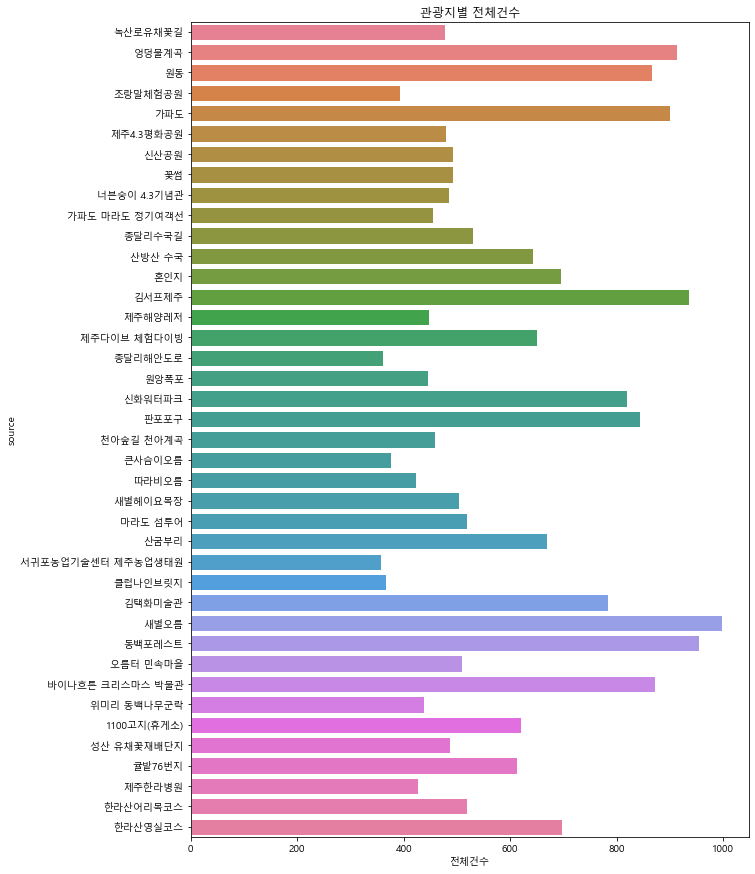

In [145]:
# 관광지별 전체 건수
f, ax = plt.subplots(figsize = (10,15))
sns.set_color_codes('pastel')
sns.barplot(x = '전체건수', y = 'source', data = seasonDf,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 전체건수')
plt.show()

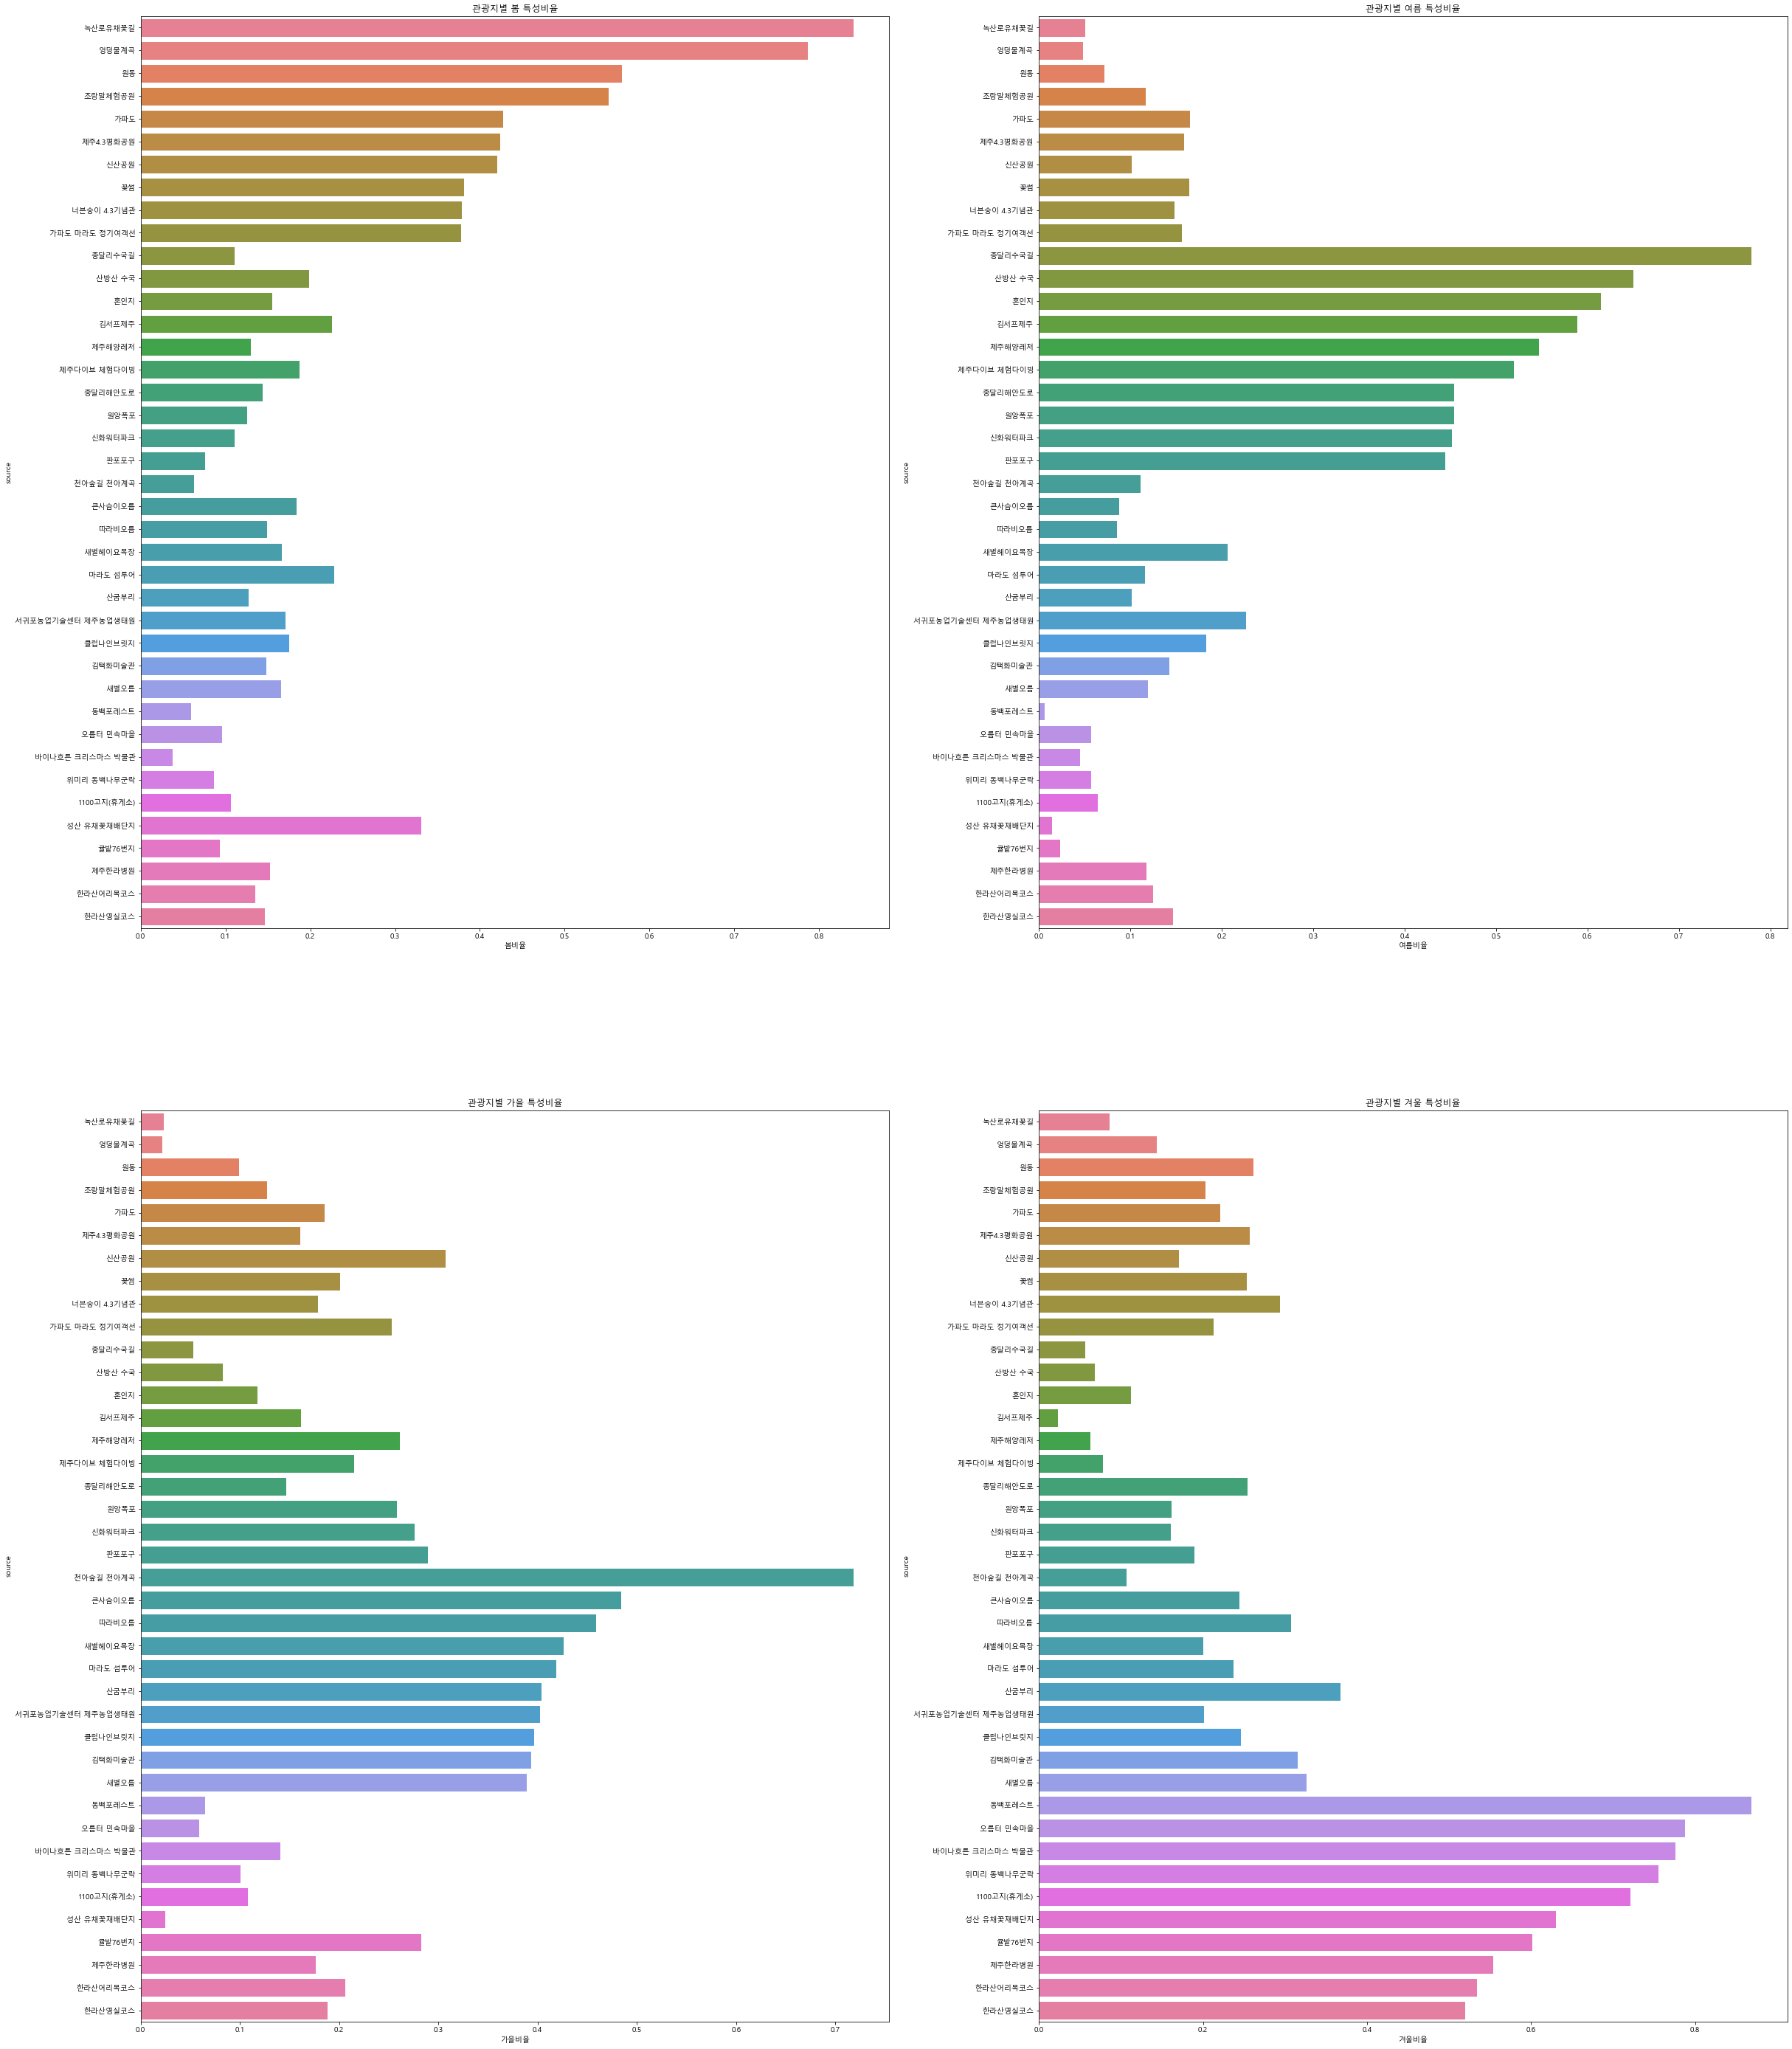

In [197]:
# 계절별 특성 top 10 관광지별 계절별 특성 시각화
f, ax = plt.subplots(figsize = (40,50))

plt.subplot(2, 2, 1)
sns.set_color_codes('pastel')
sns.barplot(x = '봄비율', y = 'source', data = seasonDf,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 봄 특성비율')

plt.subplot(2, 2, 2)
sns.set_color_codes('pastel')
sns.barplot(x = '여름비율', y = 'source', data = seasonDf,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 여름 특성비율')

plt.subplot(2, 2, 3)
sns.set_color_codes('pastel')
sns.barplot(x = '가을비율', y = 'source', data = seasonDf,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별 가을 특성비율')

plt.subplot(2, 2, 4)
sns.set_color_codes('pastel')
sns.barplot(x = '겨울비율', y = 'source', data = seasonDf,
            label = 'Total', palette = 'husl', edgecolor = 'w')
plt.title('관광지별  특성비율')
plt.show()

In [167]:
seasonDf2 = seasonDf.loc[:, ['source', '봄비율', '여름비율', '가을비율', '겨울비율']]
seasonDf2 = seasonDf2[(seasonDf2['source'] == '동백포레스트') | (seasonDf2['source'] == '천아숲길 천아계곡') | (seasonDf2['source'] == '종달리수국길') | (seasonDf2['source'] == '녹산로유채꽃길')]

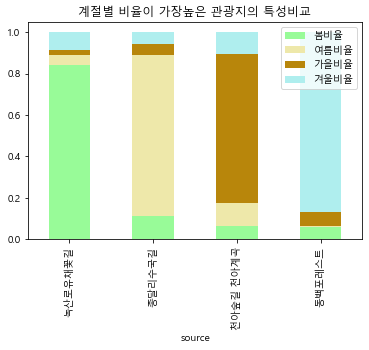

In [184]:
# 계절별 비율이 가장높은 관광지의 특성비교

seasonDf2.set_index('source').plot(kind='bar', stacked=True, color=['palegreen', 'palegoldenrod', 'darkgoldenrod', 'paleturquoise'])

plt.title('계절별 비율이 가장높은 관광지의 특성비교')

plt.show()

#### 결과: 
- 계절별 특성을 가지는 관광지의 경우 다른 계절에 비해 자신이 특성으로 가지는 계절의 비율이 현저히 높음을 보이며, 이는 전체 관광지를 대상으로 한 분류에 계절별 특성이 하나의 분류기준으로 활용될 수 있음을 의미한다.